Importing packages

In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing dataset

In [41]:
df = pd.read_csv("review_min150.csv", header = 0, names=['Review','Rating'])

In [42]:
df.shape

(15327, 2)

Calculating sentiment score

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
senti = df['Review'].apply(lambda Text: pd.Series(sid.polarity_scores(Text)['compound']))
senti.columns = ["Polarity"]

Calculating the length of each review

In [44]:
len1 = df['Review'].apply(len)
len1.head()

1    1712
2     842
3     997
4    1218
5     896
Name: Review, dtype: int64

Creating a new dataframe with Rating, polarity and length info

In [45]:
eda_temp = pd.DataFrame({'Polarity':senti['Polarity'].tolist(),'length':len1, 'Rating':df['Rating']})

In [46]:
eda_temp.head()

,Polarity,Rating,length
1,0.9966,5,1712
2,0.9374,4,842
3,0.9776,3,997
4,0.9958,4,1218
5,0.9949,5,896


Function to plot Bar graph

In [47]:
def plot_bargraph(data, title):
    index = np.arange(1,len(data.unique())+1)
    t = data.value_counts()
    plt.bar(t.index, t)
    plt.xlabel('Class Label', fontsize=10)
    plt.ylabel('No of records', fontsize=10)
    plt.xticks(index, [1,2,3,4,5], fontsize=15)
    plt.title(title)
    plt.savefig('histo_output_150.png')
    plt.show()    

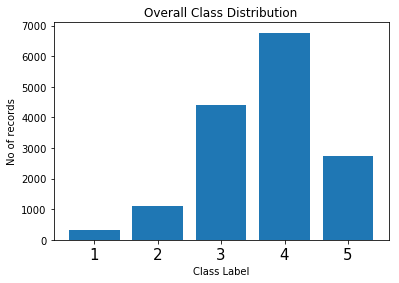

In [48]:
plot_bargraph(eda_temp['Rating'], "Overall Class Distribution")

Plotting correlation matrix as heatmap

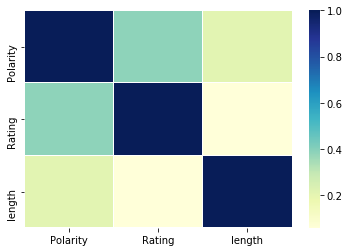

In [49]:
corr = eda_temp.corr()
# sns.heatmap(corr, linewidths=0.01,cmap="YlGnBu")


# Code for saving the figure in file
sns_plot = sns.heatmap(corr, linewidths=0.01,cmap="YlGnBu")
fig = sns_plot.get_figure()
fig.savefig("heatmap_150.png", frameon = True, bbox_inches='tight')